## Linear Filtering

convolution operation:

    g(x,y)=f(x,y)∗h(x,y)

where:

- g(x,y) is the output image,

- f(x,y) is the input image,

- h(x,y) is the filter kernel.

### Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('image_2.png',0)

## Filter Kernels

    Moving Average Filter – Smoothing, noise reduction.

$$
\frac{1}{25} \begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

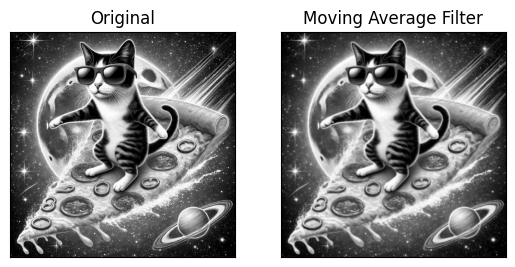

In [3]:
kernel = np.ones((5,5),np.float32)/25
average_dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(average_dst, cv2.COLOR_GRAY2RGB)),plt.title('Moving Average Filter')
plt.xticks([]), plt.yticks([])

#  set bigger size
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

    Gaussian Filter – Weighted smoothing, edge preservation.

$$
\frac{1}{256} \begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1
\end{bmatrix}
$$

This represents a Gaussian filter with a standard deviation of 0. The normalizing factor is 1/256 and ensures that the sum of all the filter coefficients equals 1.

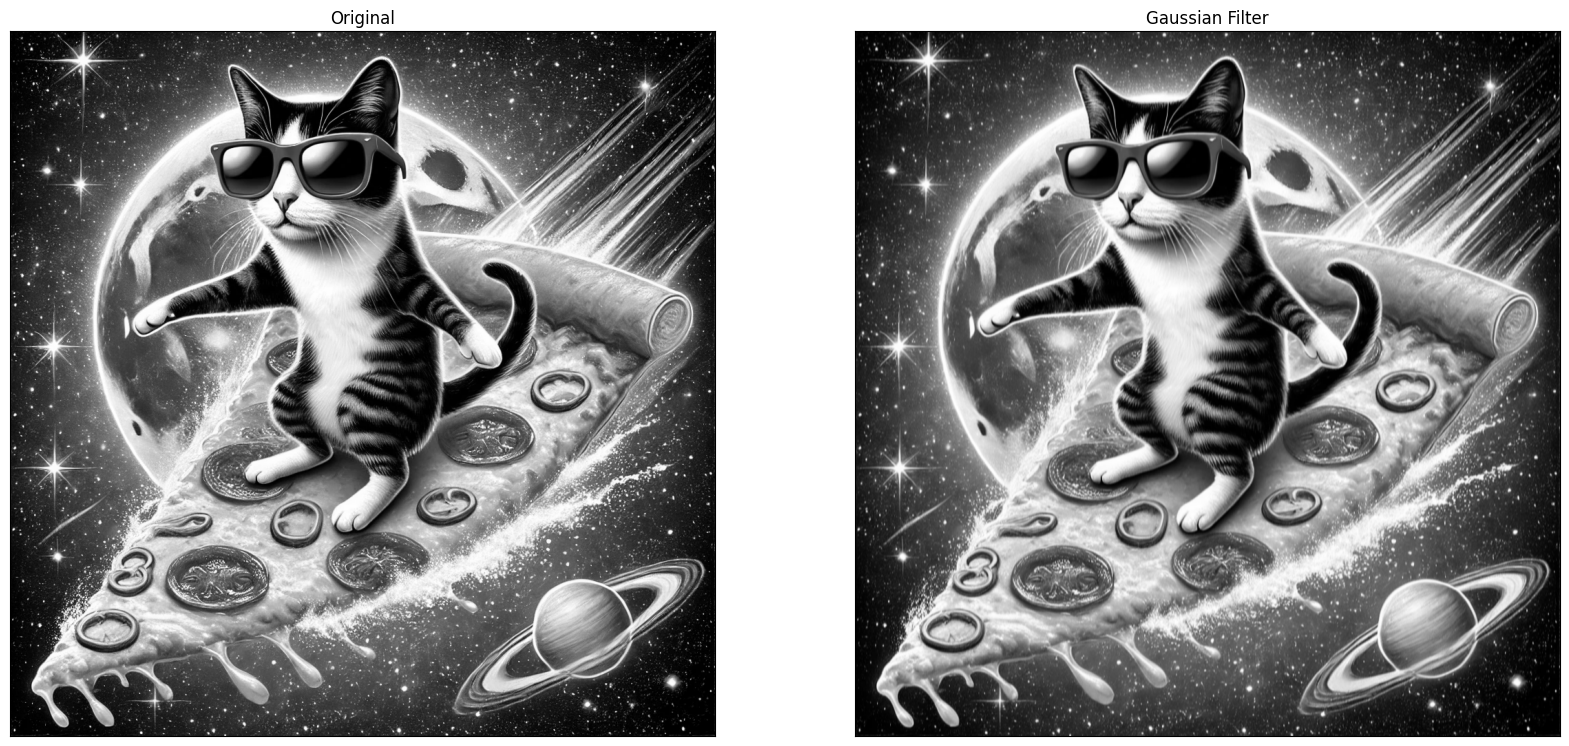

In [4]:
kernel = cv2.getGaussianKernel(5,0)
gaussian_dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(gaussian_dst, cv2.COLOR_GRAY2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

    Laplacian Filter – Edge enhancement, second-order derivative.


$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

Highlights areas of rapid intensity change. The central value is the negative of the sum of the surrounding values, making the kernel sum to zero. Thanks to this, the output on uniform areas is zero.

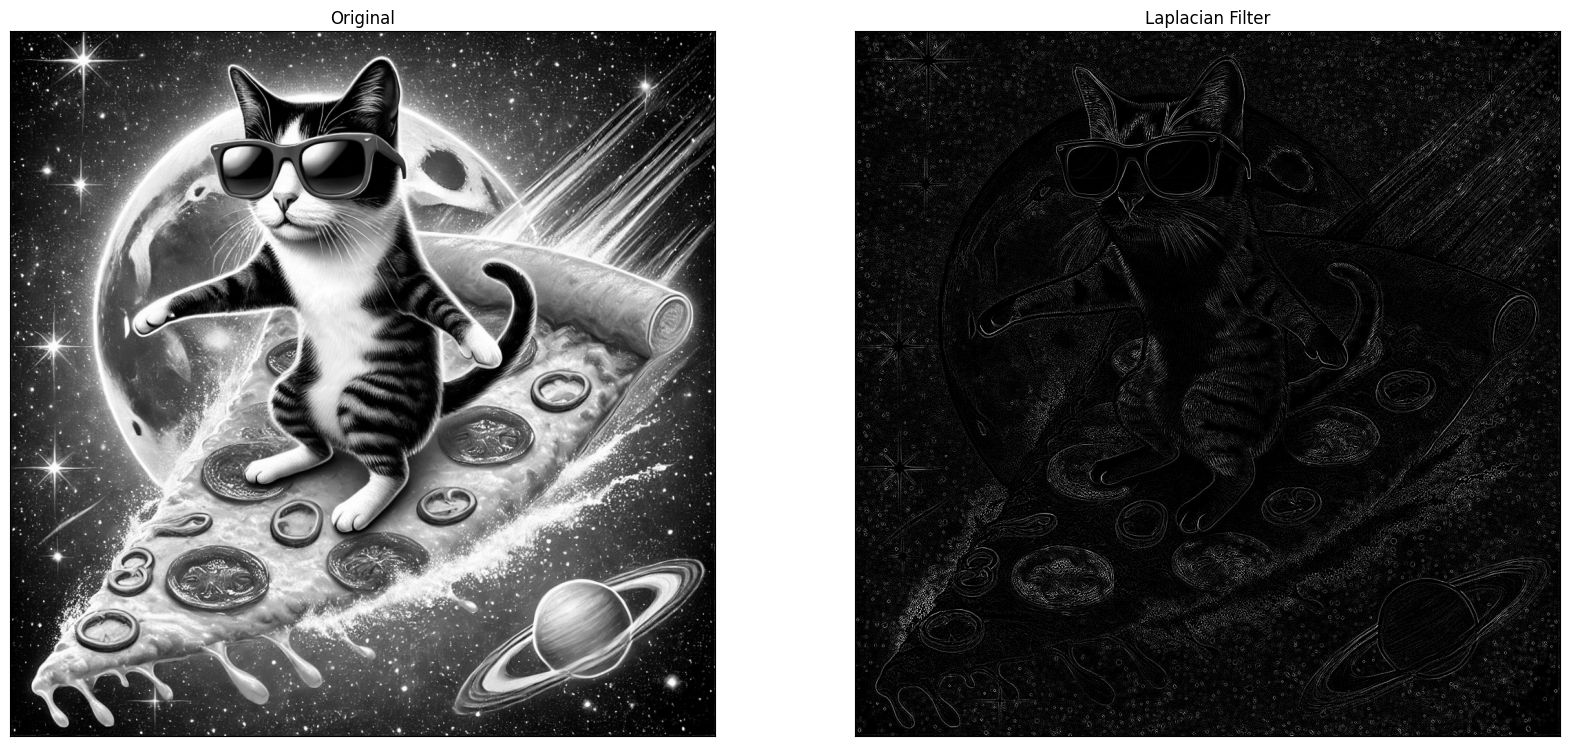

In [5]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.float32)
laplacian_dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(laplacian_dst, cv2.COLOR_GRAY2RGB)),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

    Sobel Filter – Edge detection using gradients.

$$
\begin{array}{cc}
\text{X (Horizontal)} & \text{Y (Vertical)} \\
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix} & 
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
\end{array}
$$

These kernels approximate the first derivative of the image intensities in both horizontal and vertical directions. Separately they detect edges in their respective directions. By combining the results, we can compute the magnitude of the gradient, which indicates the strength and direction of the edge.

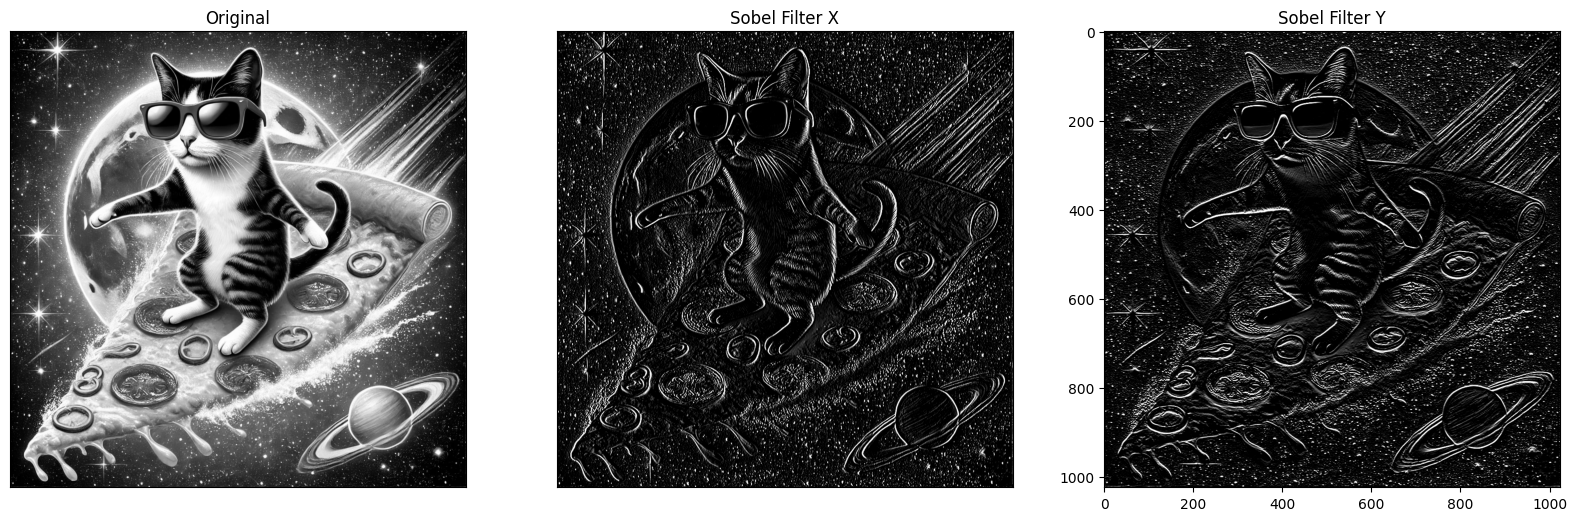

In [6]:
kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],np.float32)
sobel_dst_x = cv2.filter2D(img,-1,kernel_x)
sobel_dst_y = cv2.filter2D(img,-1,kernel_y)
plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(cv2.cvtColor(sobel_dst_x, cv2.COLOR_GRAY2RGB)),plt.title('Sobel Filter X')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(cv2.cvtColor(sobel_dst_y, cv2.COLOR_GRAY2RGB)),plt.title('Sobel Filter Y')
plt.show()

    High pass filter - highlights edges

$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

High-pass filter enhances edges and details in an image by removing low-frequency components. The center values is positive and all surrounding values are negative. The sum of the kernel is 0, which ensures that uniform areas are zero.

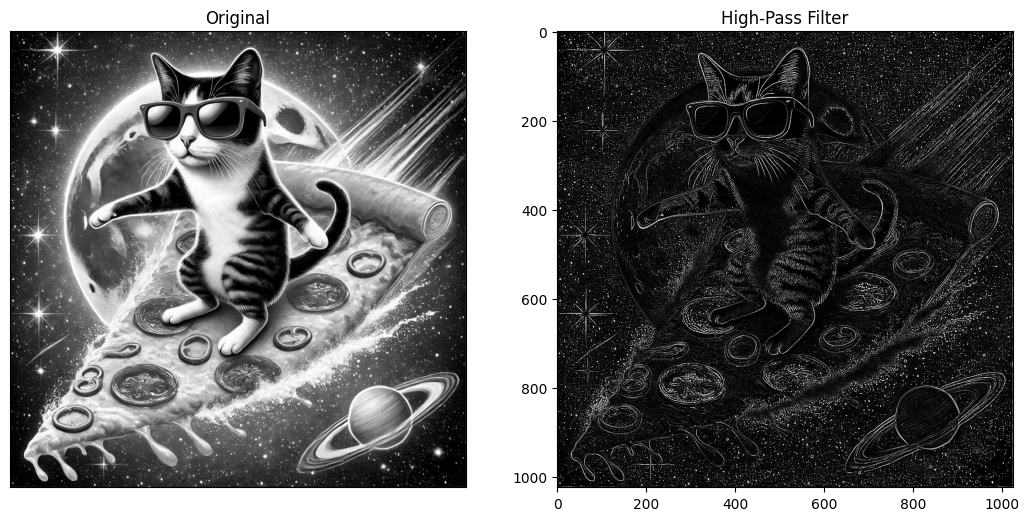

In [7]:
# Simple high-pass filter
highpass_kernel = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]], np.float32)
highpass_filtered = cv2.filter2D(img, -1, highpass_kernel)

# Display results
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(cv2.cvtColor(highpass_filtered, cv2.COLOR_GRAY2RGB)),plt.title('High-Pass Filter')
plt.show()

    Emboss Kernel - Creates a 3D effect

$$
\begin{bmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2
\end{bmatrix}
$$

Emboss filter creates a 3D effect by emphasizing the edges and contours of an image. The kernel is designed to enhance the depth perception by highlighting the differences in pixel values between adjacent pixels. Unlike other commong filters, the sum of values in an emboss kernel is typically not 0 or 1.

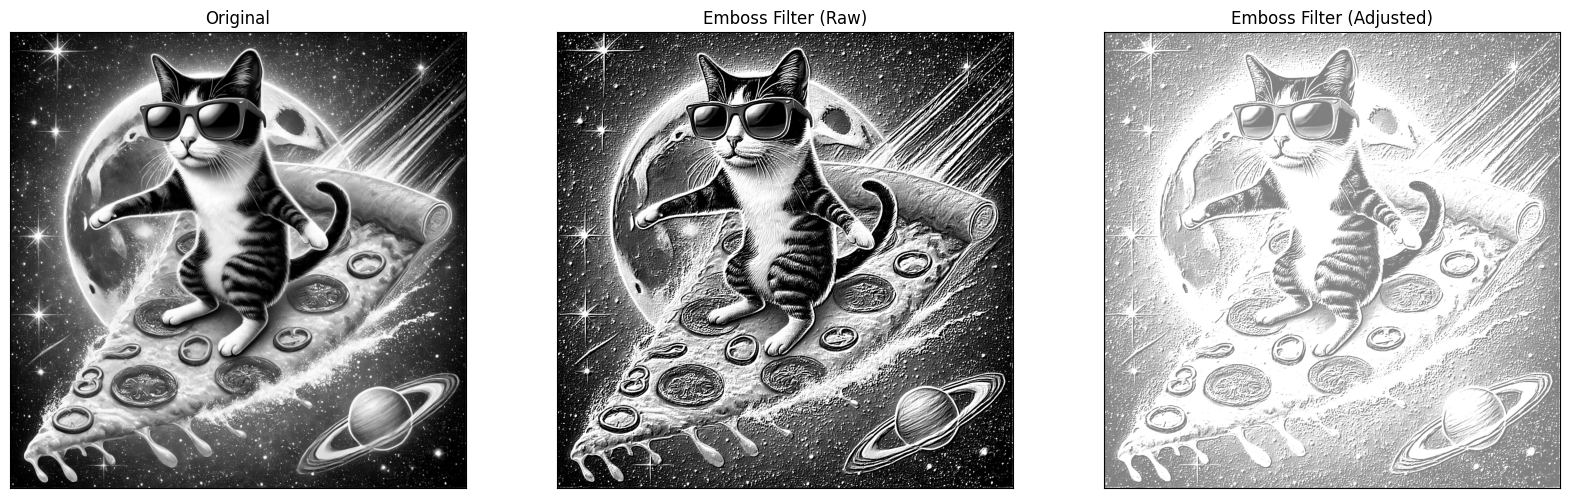

In [8]:
# Create emboss filter kernel
emboss_kernel = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]], np.float32)

# Apply the filter
emboss_filtered = cv2.filter2D(img, -1, emboss_kernel)

# A common practice with emboss is to add 128 to the result to center around middle gray
emboss_filtered_adjusted = cv2.add(emboss_filtered, 128)

# Display results
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(cv2.cvtColor(emboss_filtered, cv2.COLOR_GRAY2RGB)),plt.title('Emboss Filter (Raw)')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(cv2.cvtColor(emboss_filtered_adjusted, cv2.COLOR_GRAY2RGB)),plt.title('Emboss Filter (Adjusted)')
plt.xticks([]), plt.yticks([])
plt.show()

    Comparison of all filters

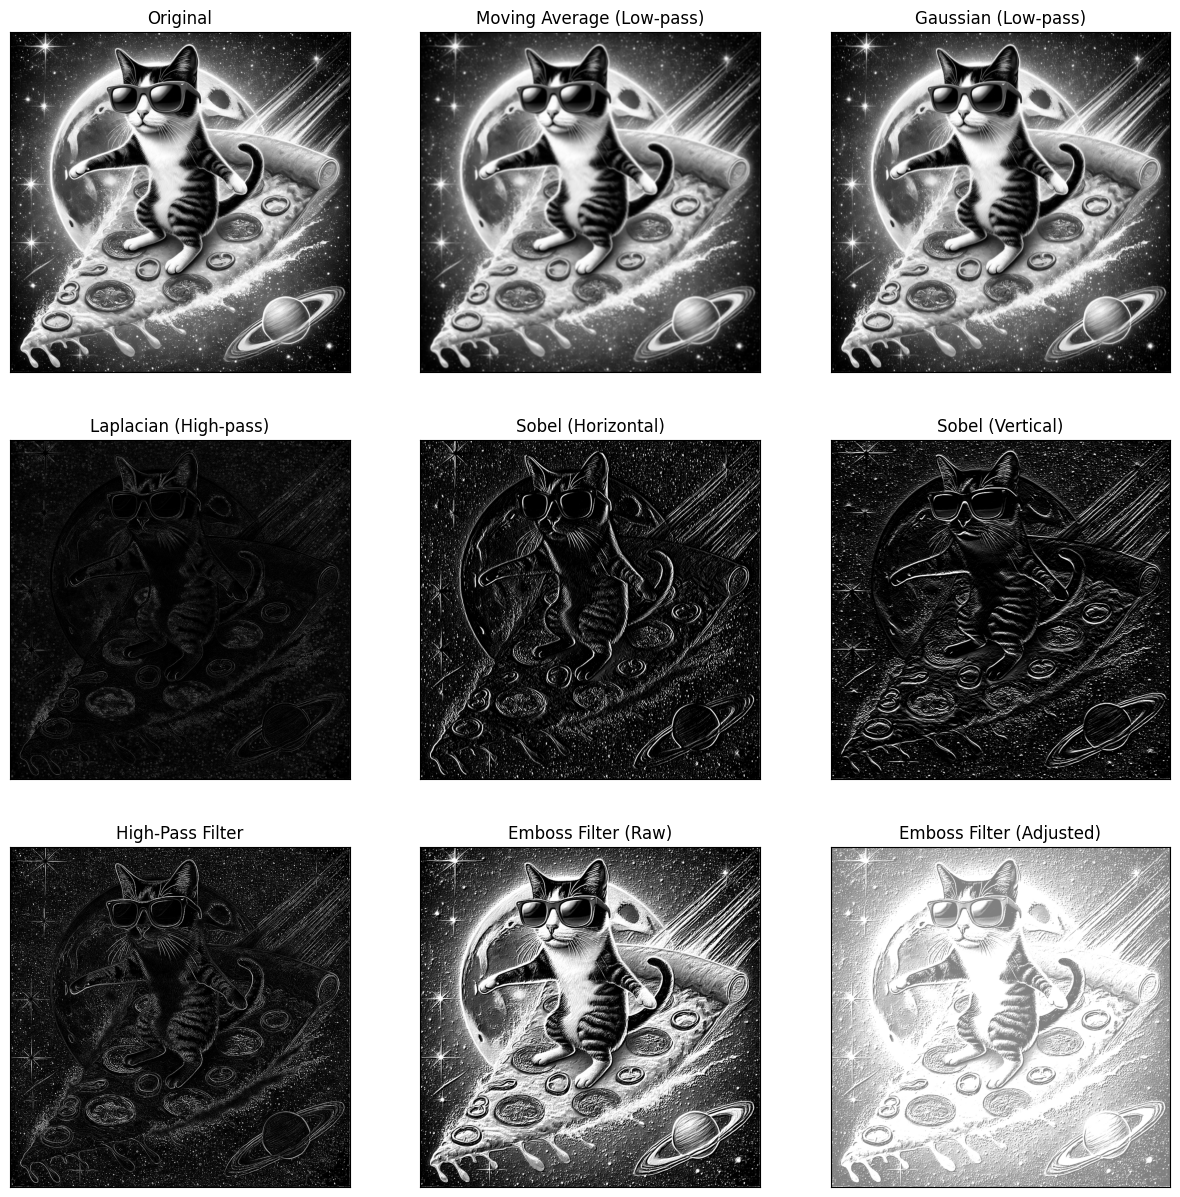

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(average_dst, cv2.COLOR_GRAY2RGB)),plt.title('Moving Average (Low-pass)')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(gaussian_dst, cv2.COLOR_GRAY2RGB)),plt.title('Gaussian (Low-pass)')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(laplacian_dst, cv2.COLOR_GRAY2RGB)),plt.title('Laplacian (High-pass)')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(sobel_dst_x, cv2.COLOR_GRAY2RGB)),plt.title('Sobel (Horizontal)')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(sobel_dst_y, cv2.COLOR_GRAY2RGB)),plt.title('Sobel (Vertical)')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(highpass_filtered, cv2.COLOR_GRAY2RGB)),plt.title('High-Pass Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(emboss_filtered, cv2.COLOR_GRAY2RGB)),plt.title('Emboss Filter (Raw)')
plt.xticks([]), plt.yticks([])
plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(emboss_filtered_adjusted, cv2.COLOR_GRAY2RGB)),plt.title('Emboss Filter (Adjusted)')
plt.xticks([]), plt.yticks([])
plt.show()
